<a href="https://colab.research.google.com/github/georginobaltazar/TP-547---Trabalhos/blob/main/Lista%20de%20cadeia%20de%20Markov/Exerc%C3%ADcio_2_List_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resultados Simulados
A probabilidade de a mosca cair em uma teia no terceiro minuto (Evento simulado) é 0.65589
Resultados Analíticos
A probabilidade de a mosca cair em uma teia no terceiro minuto (Evento analítico) é 0.657
Número Médio de Passos para a Absorção
A partir do estado 1: 3.3333333333333335
A partir do estado 2: 3.3333333333333335
Probabilidade de Ser Absorvido Associada a Cada Estado
A partir do estado 1: [0.66666667 0.33333333]
A partir do estado 2: [0.33333333 0.66666667]


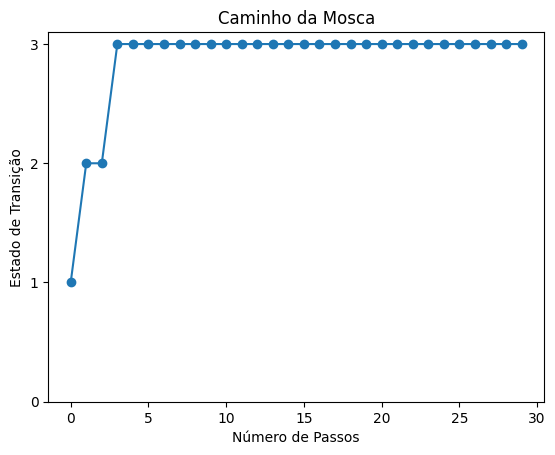

In [8]:
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt

# Definindo a matriz de transição para o problema da mosca na caixa
probabilidades_transicao = [
    [1, 0, 0, 0],  # Estado 0 (aranha, absorvente)
    [0.3, 0.4, 0.3, 0],  # Estado 1
    [0, 0.3, 0.4, 0.3],  # Estado 2
    [0, 0, 0, 1]   # Estado 3 (aranha, absorvente)
]

########## Análise Simulada ##########
n = 100000
Value1 = np.zeros(n, int)

for j in range(n):
    valor_inicial = 1  # Começa no estado 1
    chain_length = 4  # Vamos analisar até o terceiro minuto (3 passos)
    chain = np.zeros(chain_length, int)
    chain[0] = valor_inicial
    for i in range(1, chain_length):
        Linha_atual = probabilidades_transicao[chain[i - 1]]
        acumulada = np.cumsum(Linha_atual)
        r = np.random.uniform(0, 1)
        chain[i] = np.argmax(acumulada > r)
    Value1[j] = chain[3]

prob_cair_teia_simulado = np.sum(Value1 == 0) / n + np.sum(Value1 == 3) / n

print("Resultados Simulados")
print(f"A probabilidade de a mosca cair em uma teia no terceiro minuto (Evento simulado) é {prob_cair_teia_simulado}")

##################### Análise Analítica ##############################
P = np.array(probabilidades_transicao)
P3 = matrix_power(P, 3)

prob_cair_teia_analitico = P3[1, 0] + P3[1, 3]

print("Resultados Analíticos")
print(f"A probabilidade de a mosca cair em uma teia no terceiro minuto (Evento analítico) é {prob_cair_teia_analitico}")

##################### Número Médio de Passos para a Absorção ##############################
# Submatriz Q e R
Q = P[1:3, 1:3]
R = P[1:3, [0, 3]]

# Matriz identidade I
I = np.eye(Q.shape[0])

# Matriz fundamental N
N = np.linalg.inv(I - Q)

# Número médio de passos até a absorção
mean_steps = N.sum(axis=1)

print("Número Médio de Passos para a Absorção")
print(f"A partir do estado 1: {mean_steps[0]}")
print(f"A partir do estado 2: {mean_steps[1]}")

##################### Probabilidade de Ser Absorvido ##############################
# Matriz de absorção B
B = np.dot(N, R)

print("Probabilidade de Ser Absorvido Associada a Cada Estado")
print(f"A partir do estado 1: {B[0]}")
print(f"A partir do estado 2: {B[1]}")

##################### Plot ##############################
valor_inicial = 1  # Começa no estado 1
chain_length = 30
chain = np.zeros(chain_length, int)
chain[0] = valor_inicial
for i in range(1, chain_length):
    Linha_atual = probabilidades_transicao[chain[i - 1]]
    acumulada = np.cumsum(Linha_atual)
    r = np.random.uniform(0, 1)
    chain[i] = np.argmax(acumulada > r)

i = np.arange(chain_length)
plt.plot(i, chain, 'o-')
plt.xlabel('Número de Passos')
plt.ylabel('Estado de Transição')
plt.title('Caminho da Mosca')
plt.yticks([0, 1, 2, 3])
plt.show()
